In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_absolute_percentage_error
import joblib
import pickle

In [2]:
#Load csv file

housing = ("Resources/Modified_housing.csv")

housing_df = pd.read_csv(housing)
housing_df.dropna()
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long,renovation_category,renovation_category_numeric,color
0,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045,Never Renovated,0,[0.5 0. 1. 1. ]
1,7237550310,1225000.0,4,4.0,5420,101930,1.0,0,0,2001,0,98053,47.6561,-122.005,Never Renovated,0,[0.5 0. 1. 1. ]
2,1321400060,257500.0,3,2.0,1715,6819,2.0,0,0,1995,0,98003,47.3097,-122.327,Never Renovated,0,[0.16666667 0.8660254 0.8660254 1. ]
3,3793500160,323000.0,3,2.0,1890,6560,2.0,0,0,2003,0,98038,47.3684,-122.031,Never Renovated,0,[0.16666667 0.8660254 0.8660254 1. ]
4,1875500060,395000.0,3,2.0,1890,14040,2.0,0,0,1994,0,98019,47.7277,-121.962,Never Renovated,0,[0.16666667 0.8660254 0.8660254 1. ]


In [3]:
# Encode the categorical column into dummy/indicator variables
dummies = pd.get_dummies(housing_df, columns=['renovation_category' ], dtype=int)
dummies.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long,renovation_category_numeric,color,renovation_category_Never Renovated,renovation_category_Renovated 2000-2010,renovation_category_Renovated 2010-2015,renovation_category_Renovated before 2000
0,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045,0,[0.5 0. 1. 1. ],1,0,0,0
1,7237550310,1225000.0,4,4.0,5420,101930,1.0,0,0,2001,0,98053,47.6561,-122.005,0,[0.5 0. 1. 1. ],1,0,0,0
2,1321400060,257500.0,3,2.0,1715,6819,2.0,0,0,1995,0,98003,47.3097,-122.327,0,[0.16666667 0.8660254 0.8660254 1. ],1,0,0,0
3,3793500160,323000.0,3,2.0,1890,6560,2.0,0,0,2003,0,98038,47.3684,-122.031,0,[0.16666667 0.8660254 0.8660254 1. ],1,0,0,0
4,1875500060,395000.0,3,2.0,1890,14040,2.0,0,0,1994,0,98019,47.7277,-121.962,0,[0.16666667 0.8660254 0.8660254 1. ],1,0,0,0


In [4]:
dummies.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'renovation_category_numeric', 'color',
       'renovation_category_Never Renovated',
       'renovation_category_Renovated 2000-2010',
       'renovation_category_Renovated 2010-2015',
       'renovation_category_Renovated before 2000'],
      dtype='object')

In [5]:
#create the model
model = RandomForestRegressor()

In [6]:
#Train the model
X = dummies[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'yr_built','zipcode'
       ]]
X= X[:int(len(dummies)-1)]
y = dummies['price']
y = y[:int(len(dummies)-1)]
model.fit(X,y)

RandomForestRegressor()

In [7]:
#Test the model
predictions = model.predict(X)
print("The model score is:", model.score(X,y))

The model score is: 0.9732198544110154


In [8]:
#Make the prections
new_data = dummies[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'yr_built','zipcode']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row to be:', prediction)
print('Actual value is:',dummies[['price']].tail(1).values[0][0])

The model predicts the last row to be: [367496.51]
Actual value is: 325000.0


In [9]:
# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Square Error (MSE):', mse)

Mean Absolute Error (MAE): 32210.655634705156
Mean Square Error (MSE): 4357039805.531024


In [10]:
# Calculate Mean Absolute Percentage Error (MAPE) 
mape = mean_absolute_percentage_error(y, predictions)
mape
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y, predictions)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Percentage Error (MAPE): 5.055512649025563


In [11]:
# export the model using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [15]:
# Calculate feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


       Feature  Importance
2  sqft_living    0.640315
7      zipcode    0.203475
6     yr_built    0.038721
4   waterfront    0.038336
5         view    0.035465
0     bedrooms    0.018441
1    bathrooms    0.015874
3       floors    0.009374


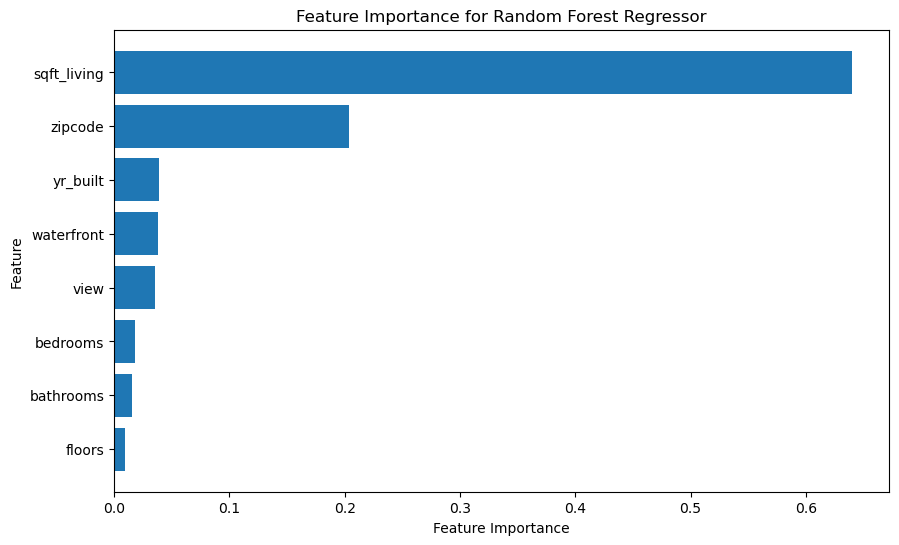

In [14]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()